In [314]:
function check_profits(ix, amount, prices_test, prices_val, xsol)
    profit = 0
    exp_returns = 0
    init_vals = prices_test[:,1] .* prices_test[:,2]
    final_vals = prices_val[:,1] .* prices_val[:,2]
    
    for i in 1:length(ix)
        company = tickers[ix[i]]
        # Price - price of company
        init_price = init_vals[ix[i]]
        final_price = final_vals[ix[i]]
        percent_invested = xsol[ix1[i]]
        println("Percent invested: ", percent_invested)
        percent_invested = abs(percent_invested)
        invested = percent_invested*amount
        num_stocks = invested/init_price
        final_sell_price = num_stocks*final_price
        diff = final_sell_price - invested
        profit+=diff
        println("Bought ", company, " at ", init_price, " sold: ", final_price)
    end
    exp_returns = profit/amount
    println("Total profit: ", profit)
    println("Portfolio returns (percent) ", exp_returns)
end

check_profits (generic function with 1 method)

In [ ]:
#OLD check profits function without adjusting for splits
# function check_profits(ix, amount, prices_test, prices_val, xsol)
#     profit = 0
#     exp_returns = 0
#     for i in 1:length(ix)
#         print("Loop started")
#         company = tickers[ix[i]]
#         init_price = prices_test[ix[i]]
#         final_price = prices_val[ix[i]]
#         percent_invested = xsol[ix1[i]]
#         println(percent_invested)
#         percent_invested = abs(percent_invested)
#         invested = percent_invested*amount
#         num_stocks = invested/init_price
#         final_sell_price = num_stocks*final_price
#         diff = final_sell_price - invested
#         profit+=diff
#         println("Bought ", company, " at ", init_price, " sold: ", final_price)
#     end
#     exp_returns = profit/amount
#     println("Total profit: ", profit)
#     println("Portfolio returns (percent) ", exp_returns)
# end

In [284]:
using LinearAlgebra

function get_diff_expected_prices(coeffs, raw_test, test_company_num)
    test_comp_name = raw_test[1][test_company_num]
    actual_prices = raw_test[78]
    num_shares = raw_test[77]
    actual_valuations = actual_prices .* num_shares
    
#     raw_temp = raw_test[:,3:76] #All fundamentals
#     raw_temp = convert(Matrix, raw_temp)
    
    raw_temp = re_normalize(raw_test) #normalize with intercept
    
    #raw_temp = raw_temp./scale #only use if using normalized, run normalize before this, DEPRECATED
    exp_valuations = raw_temp * coeffs
    println("Expected valuation for ", test_comp_name,  " before bias: ", exp_valuations[test_company_num])
    exp_valuations = exp_valuations - bias
    exp_prices = exp_valuations ./ num_shares
    diff = (exp_prices - actual_prices)./actual_prices*100
    println("Expected valuation for ", test_comp_name,  ": ", exp_valuations[test_company_num])
    println("Actual valuation for ", test_comp_name,  ": ", actual_valuations[test_company_num])
    println("Bias: ", bias[test_company_num])
    println("Percent diff: ", diff[test_company_num])
    return diff
end

get_diff_expected_prices (generic function with 2 methods)

In [184]:
function clean_xsol(xsoli)
    xsol = xsoli
    for i in 1:length(xsol)
        #print(l)
        #println(xsol[i])
        if abs(xsol[i]) < 0.0001
            xsol[i] = 0
#         else
#             xsol[i] = xsol[i]*-1
        end
    end
    return xsol
end

clean_xsol (generic function with 1 method)

In [188]:
using CSV
file1 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_training_set.csv"
file2 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
file3 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw_train = CSV.read(file1);
raw_test = CSV.read(file2);
raw_val = CSV.read(file3);

#raw = vcat(raw_train, raw_test, raw_val)
raw = vcat(raw_train, raw_val)
#raw = raw_train

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Dates…⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53,1330000000,0,127000000,1.0499e10,78,0,223000000,1001000000,-1813000000,-2445000000,0,0,1.3402e10,0.0,58,1.4356e10,-569000000,8.69e8,632000000,580000000,306000000,473000000,7.116e9,0.0,0,0,-1020000000,197000000,1285000000,483000000,-1571000000,-1876000000,2050000000,-1876000000,-4084000000,1124000000,386000000,148000000,1,2167000000,626000000,4524000000,-2980000000,1509000000,11000000,15147000000,-141000000,845000000,10,31,8,72,0,-9.462e9,0,12977000000,1419000000,3.412e9,2.351e10,7.072e9,9011000000,-7.987e9,2.4891e10,1.6904e10,2.4855e10,-3.67e8,-5.6,3.35e8,13.5
2,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75,2175000000,0,5000000,1.1019e10,104,0,935000000,1020000000,-1324000000,-2180000000,0,0,1.9259e10,4.086e9,59,1.5724e10,-346000000,2.311e9,856000000,1012000000,-1181000000,-235000000,1.5353e10,0.0,0,0,2208000000,660000000,675000000,3799000000,-3814000000,-1834000000,1873000000,-1834000000,-4489000000,1560000000,559000000,1399000000,5,2299000000,1465000000,7385000000,-2032000000,1711000000,481000000,14915000000,-56000000,853000000,8,80,7,96,0,-1.1296e10,0,12913000000,1446000000,8.111e9,4.2278e10,1.4323e10,13806000000,-2.731e9,4.5009e10,4.2278e10,2.6743e10,0.0,-11.25,1.63022e8,25.25
3,AAP,2012-12-29,2409453000,-89482000,600000,32,-271182000,520215000,23,598111000,-260298000,7000,3.10697e9,124,0,0,189544000,657915000,624074000,0,0,1.29255e9,7.6389e7,50,3.09804e9,236404000,2.8845e7,33841000,2308609000,0,426323000,6.04461e8,0.0,0,0,177445000,540210000,685281000,127907000,-272978000,387670000,23311000,387670000,387670000,229866000,0,657315000,11,31833000,47614000,149558000,2667000,-33499000,-1796000,239021000,8213000,0,10,52,6,34,0,7.149e8,-18600000,2440721000,627000,0.0,4.61381e9,3.1842e9,2559638000,1.21069e9,3.40312e9,4.61381e9,6.205e9,-2.7095

In [189]:
using Statistics
scale = ones(75) #75 because added a term for intercept
#Takes in dataframe and returns columns 3 - 76, normalized as a matrix
function normalize(data)
    newdata = ones(length(data[:,1]), 75)

    for i in 3:76
        maxval = abs(maximum(data[:,i]))
        minval = abs(minimum(data[:,i]))

        if maxval != 0
            newdata[:,i-2] = data[:,i]/maxval
            scale[i-2] = maxval
        elseif minval != 0
            newdata[:,i-2] = data[:,i]/minval
            scale[i-2] = minval
        else
            mean = mean(data[:,i])
            newdata[:,i-2] = data[:,i]/mean
            scale[i-2] = mean
        end
    end
    return newdata
end
        

normalize (generic function with 1 method)

In [247]:
#Used to normalize test data by scaling with the same factor as train data
function re_normalize(test)
    newdata = ones(length(test[:,1]), 75)
    
    for i in 3:76
        newdata[:, i-2] = test[:,i]
    end
    
    newdata = newdata ./ scale'
    return newdata
end

re_normalize (generic function with 1 method)

In [253]:
#re_normalize(raw_train)

In [264]:
scale

75-element Array{Float64,1}:
    6.0486e10
    1.044e9  
    1.4162e10
 3433.0      
    3.7985e10
    9.1091e10
 1041.0      
    5.3528e10
    2.658e9  
    6.8178e10
    3.61e11  
 1188.0      
    2.2736e10
    ⋮        
    1.7925e10
    1.07e11  
    3.47e11  
    1.4e11   
    7.9006e10
    1.74e11  
    2.35e11  
    3.47e11  
    4.82e11  
    2.13e11  
   41.52     
    1.0      

In [192]:
using Statistics

B = normalize(raw)

924×75 Array{Float64,2}:
 0.0505678   -0.0473146    -0.138469     …  -0.00159565   -0.111799    1.0
 0.0819996   -0.019821     -0.192275         0.0          -0.224596    1.0
 0.0397134   -0.0190712     4.23669e-5      -0.000117804   0.10561     1.0
 0.0430064   -0.00691134    0.00019051      -0.000469087   0.107007    1.0
 0.0619255   -0.00457715   -0.000528456     -0.000520474   0.128768    1.0
 0.59704     -0.415388      0.0816269    …   0.0           0.799162    1.0
 0.977749     0.222506      0.0951843        0.0           0.1667      1.0
 0.106278     0.145141     -0.00381302      -0.0013913     0.0515073   1.0
 0.245103    -0.492864     -3.10691e-6      -0.00659503    0.0375324   1.0
 0.406622    -0.194528      0.000356447     -0.0191131     0.134358    1.0
 0.179476     0.00767263   -0.0889705    …  -0.0243087     0.0750649   1.0
 0.098037    -0.0240835     0.00374241      -0.0297565     0.0327411   1.0
 0.0120199    0.00717157    6.53862e-5      -0.01584       0.0115792   1.0


In [193]:
# A = []

# for i in 3:76
#     push!(A, raw[:,i])
# end

# A

In [194]:
# B = zeros(length(A),length(A[1]))

# for i in 1:length(A)
#     for j in 1:length(A[i])
#         B[i,j] = A[i][j]
#     end
# end

In [195]:
# B = B'
# B

In [196]:
prices = raw[:78]
shares = raw[:77]

mkt_cap = prices.*shares
y = mkt_cap

924-element Array{Float64,1}:
 4.5225e9             
 4.1163111105499997e9 
 5.2405070845259075e9 
 8.033962420493641e9  
 1.1046686916792408e10
 4.466553096787736e11 
 6.16692422074763e11  
 8.44960016e10        
 1.4095477040689575e10
 1.71393912657483e10  
 1.0387663989186172e11
 6.0206149470773415e10
 2.8388531049987858e10
 ⋮                    
 1.7044808987484e10   
 8.583359306258436e9  
 7.001096109288057e9  
 8.306781057429774e9  
 1.8223121828267998e10
 1.1242828328632e10   
 3.269850523658344e11 
 8.539396365504609e9  
 1.199671429027e10    
 3.124634883706134e10 
 3.221616336101414e10 
 1.9334268480868847e10

In [197]:
prices

924-element Array{Union{Missing, Float64},1}:
  13.5              
  25.25             
  71.510002         
 109.91999799999999 
 150.509995         
 482.750008         
 112.709999         
  52.810001         
  61.099998         
  80.779999         
  65.499944         
  38.330002         
  56.779999         
   ⋮                
  29.98             
  72.650002         
  69.190002         
  89.379997         
  35.91             
  42.32             
  77.949997         
  60.849998         
  10.63             
  33.259997999999996
  74.000004         
 102.589996         

In [198]:
# using Pkg
# Pkg.add("Ipopt")
#Pkg.build("Gurobi")

In [199]:
# NOTE: must have either Gurobi or Mosek installed!

# Solve the LEAST SQUARES polynomial fit

using JuMP, Ipopt
#,Mosek , Gurobi

#m = Model(solver=ClpSolver())
#m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))
#m = Model(solver=GurobiSolver(OutputFlag=0,NumericFocus=3,BarHomogeneous=1))
m = Model(solver=IpoptSolver())

@variable(m, u[1:75]) #Changed to 75 to add intercept
#@constraint(m, bound[i in 1:74],u[i] <= 100000)
@objective(m, Min, sum( (y - B*u).^2 ) )
# 1/1000000000000000
status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt)

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:  5197500

Total number of variables............................:       75
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [260]:
#save = uopt

#save2 = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]

# Normalized with intercep
#coeffs = [-4.55676e14, 2.46818e10, -3.77511e10, -1.38782e11, 6.95597e12, 1.03861e11, -2.71076e9, 1.87415e12, 2.69544e10, 6.21423e10, -1.05934e13, -3.03506e9, 1.18112e12, -3.40932e11, 2.10689e11, -6.27908e12, 5.99679e12, 3.87407e8, 6.64783e10, 1.31084e13, 5.38395e12, -1.63185e9, -4.1155e12, 3.56834e10, 6.19797e12, 2.63195e11, 1.54277e12, 6.96175e12, 2.09787e11, -4.2848e11, 8.6936e12, -2.30521e11, -1.17471e10, 1.71563e11, -6.94141e11, 3.61272e11, 2.13911e11, -1.21623e12, -1.10974e12, 1.61937e11, 1.57574e12, 3.78045e10, 2.98891e12, 1.27737e10, 3.35723e11, -7.6941e10, 8.33459e11, 5.8326e11, -2.51078e14, 1.28701e10, 1.11819e10, 1.995e12, -3.12065e11, 5.82627e10, -1.57679e10, 6.76803e10, 1.51553e11, 6.93257e10, 1.82232e10, 8.8073e9, 2.89928e11, 1.57745e10, -4.75023e10, -3.2283e14, 3.70423e12, -2.03617e13, 2.49779e12, 6.18186e14, -1.09324e13, -1.6194e13, 2.48495e13, 1.39488e13, 6.71318e10, -2.22554e10, 4.71412e9]

#Normalized, intercept, train only
#coeffs = [-5.70356e14, 2.05396e10, -7.18393e10, -1.85909e11, 7.02275e12, 8.72143e10, -8.65342e9, 4.42853e12, 1.55964e10, -2.83099e9, 4.39582e12, -5.39104e9, 8.61803e11, -3.32481e11, 1.2151e11, 9.62581e13, -9.61073e13, 7.42026e9, 2.2769e10, 9.25989e12, 3.77941e12, 1.72924e10, 1.72533e12, 2.12777e10, 4.47301e12, -6.08057e12, 3.65248e12, 6.94972e12, 1.70492e11, -3.60345e11, 6.2001e12, -2.70019e11, -8.7377e9, 1.20104e11, -4.75848e11, 3.22162e11, 7.2644e10, -1.27765e12, -3.06167e12, 8.20039e10, 3.15543e12, -1.47952e10, 6.75338e12, 3.48025e10, 5.60541e11, -1.05393e11, 6.4975e11, 1.14813e12, -3.14184e14, 9.99228e9, 1.11959e10, 2.01743e12, -2.64519e11, 1.71905e10, -3.59735e10, 1.3597e11, 1.91675e11, 4.99202e10, 7.8925e9, -5.84887e10, 2.66363e11, 9.12478e9, 8.07864e10, -4.04067e14, 8.59193e12, -1.46795e13, -5.82343e12, 7.73806e14, -8.59508e12, -1.28688e13, 1.99519e13, -5.92566e12, -6.39398e10, -7.55342e7, -5.55713e9]

#Normalized, intercept, train, fixed
coeffs = [-5.70356e14, 2.05396e10, -7.18393e10, -1.85909e11, 7.02275e12, 8.72143e10, -8.65342e9, 4.42853e12, 1.55964e10, -2.83099e9, 4.39582e12, -5.39104e9, 8.61803e11, -3.32481e11, 1.2151e11, 9.62581e13, -9.61073e13, 7.42026e9, 2.2769e10, 9.25989e12, 3.77941e12, 1.72924e10, 1.72533e12, 2.12777e10, 4.47301e12, -6.08057e12, 3.65248e12, 6.94972e12, 1.70492e11, -3.60345e11, 6.2001e12, -2.70019e11, -8.7377e9, 1.20104e11, -4.75848e11, 3.22162e11, 7.2644e10, -1.27765e12, -3.06167e12, 8.20039e10, 3.15543e12, -1.47952e10, 6.75338e12, 3.48025e10, 5.60541e11, -1.05393e11, 6.4975e11, 1.14813e12, -3.14184e14, 9.99228e9, 1.11959e10, 2.01743e12, -2.64519e11, 1.71905e10, -3.59735e10, 1.3597e11, 1.91675e11, 4.99202e10, 7.8925e9, -5.84887e10, 2.66363e11, 9.12478e9, 8.07864e10, -4.04067e14, 8.59193e12, -1.46795e13, -5.82343e12, 7.73806e14, -8.59508e12, -1.28688e13, 1.99519e13, -5.92566e12, -6.39398e10, -7.55342e7, -5.55713e9]

maximum(coeffs)
#scale

7.73806e14

In [265]:
(B * coeffs)[6]

4.7632903309441077e11

In [273]:
(re_normalize(raw)*coeffs)[6]

4.7632903309441077e11

In [202]:
test = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
raw2 = CSV.read(test)

raw2

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Dates…⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60,1768000000,0,7000000,1.562e10,88,0,829000000,1342000000,4099000000,3212000000,0,0,2.3084e10,4091000000,63,2.703e10,330000000,2240000000,887000000,1004000000,1799000000,-1026000000,1.6043e10,0.0,0,0,170000000,-146000000,3080000000,-315000000,-2911000000,2882000000,542000000,2882000000,2882000000,1771000000,800000000,4249000000,10,2060000000,898000000,7059000000,-4559000000,817000000,601000000,10928000000,-500000000,1295000000,8,159,7,80,0,-8.562e9,-1052000000,20686000000,1677000000,6309000000,4.3225e10,1.175e10,13404000000,2.021e9,4.1204e10,4.3225e10,4.265e10,0.0,4.02,7.16915e8,53.63
2,AAPL,2014-09-27,48649000000,-6452000000,980000000,35,-9571000000,0,40,13844000000,-76000000,23313000000,1.12e11,108,0,3031000000,7946000000,53483000000,53483000000,0,0,2.0624e10,4616000000,39,7.0537e10,13973000000,4142000000,0,2111000000,-9027000000,13408000000,2.8987e10,1.3e11,0,0,18266000000,-415000000,59713000000,-37549000000,-22579000000,39510000000,5210000000,39510000000,39510000000,31537000000,0,52503000000,29,3764000000,9806000000,8491000000,1082000000,-1158000000,-3981000000,24826000000,167000000,0,29,48,22,105,6041000000,8.7152e10,-44270000000,11993000000,6308000000,11233000000,2.32e11,6.8531e10,63448000000,1.12e11,1.2e11,2.32e11,1.83e11,0.0,6.49,6.08783e9,100.75
3,ABC,2014-09-30,17250160000,-938286000,-28594000,14,-264457000,2749185000,10,1808513000,-1304569000,2711000,1.17e11,97,0,241205000,196617000,753497000,669863000,0,0,8.99582e8,0,2,2.98237e9,388087000,3481744000,83634000,8593852000,-117794000,2310596000,1.99563e9,0.0,0,0,566402000,577507000,1464654000,-502992000,-384155000,274230000,912505000,274230000,281776000,6312883000,0,782091000,1,350652000,84957000,0,-52046000,0,-1904000,88287000,21107000,188680000,1,34,0,48,0,1.57043e9,-626020000,2011595000,0,0,2.15322e10,1.68002e10,1725

In [16]:
AAPL = raw2[302,3:76]

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
302,540800000,7200000,5700000,14,-99600000,221700000,23,151600000,21000000,1600000,1.3228e9,185,0,165600000,133700000,451300000,404400000,-8900000,-400000,5.888e8,2089300000,55,1.5998e9,81100000,670800000,46900000,387100000,-30500000,29400000,1.1501e9,0.0,900000,0,-186800000,76600000,560400000,-336200000,-138700000,322900000,57400000,322900000,322900000,426600000,11100000,445600000,15,90600000,241700000,0,-441100000,0,-8600000,356000000,-11200000,0,14,17,11,126,0,3.3807e9,-114200000,1143100000,111800000,0,4.6465e9,1.207e9,652600000,2.3213e9,2.3252e9,4.6465e9,2.9226e9,-8.416e8,2.28


In [17]:
using LinearAlgebra
AAPL = convert(Array, AAPL)

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[17]:2
└ @ Core In[17]:2


1×74 Array{Any,2}:
 540800000  7200000  5700000  14  …  4.6465e9  2.9226e9  -8.416e8  2.28

In [18]:
AAPL_Test = AAPL * save

1-element Array{Any,1}:
 NaN

In [19]:
AAPL_shares = raw2[302,77]

1.41622807e8

In [20]:
AAPL_price = raw2[302, 78]

53.27

In [21]:
AAPL_shares * AAPL_price

7.54424692889e9

In [22]:
AAPL_Test/AAPL_shares

1-element Array{Float64,1}:
 NaN

### Part 2: 

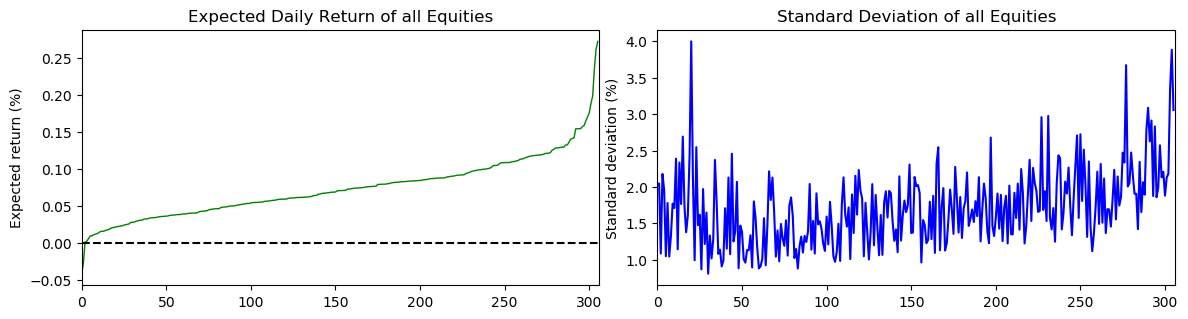

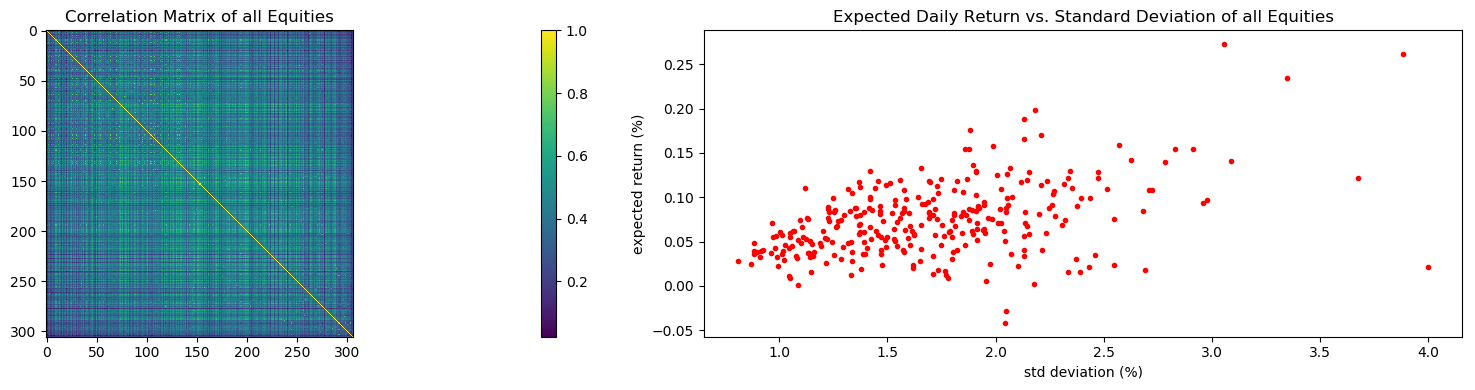

In [57]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 306

using PyPlot
fig = figure(figsize=(12,6))

plot1 = fig[:add_subplot](2,2,1);
xlim(0,nAssets)
plot(μ[ix], linewidth = 1, c = :green)
plot([0,nAssets],[0,0],"k--")
ylabel("Expected return (%)")
title("Expected Daily Return of all Equities")

plot2 = fig[:add_subplot](2,2,2);
xlim(0,nAssets)
plot(sqrt.(diag(Σ))[ix],c = :blue)
ylabel("Standard deviation (%)")
title("Standard Deviation of all Equities")
tight_layout()

#savefig("folio1_vals.pdf")
fig = figure(figsize=(16,4))
plot3 = fig[:add_subplot](1,2,1); 
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(0 => diag(Σ).^(-1/2))*Σ*diagm(0 => diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation Matrix of all Equities")

# plot each asset individually
plot4 = fig[:add_subplot](1,2,2);
plot(sqrt.(diag(Σ)), μ, "r.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
title("Expected Daily Return vs. Standard Deviation of all Equities")
tight_layout()
#savefig("folio3_assets.pdf")
;

#savefig("folio2_cov.pdf")
;

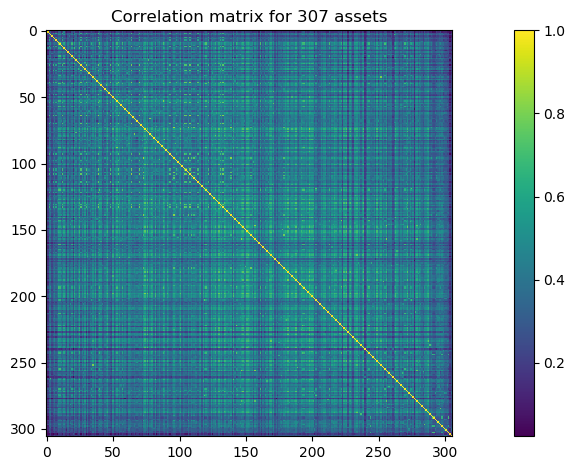

In [75]:
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(0 => diag(Σ).^(-1/2))*Σ*diagm(0 => diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation matrix for 307 assets")
tight_layout()
#savefig("folio2_cov.pdf")

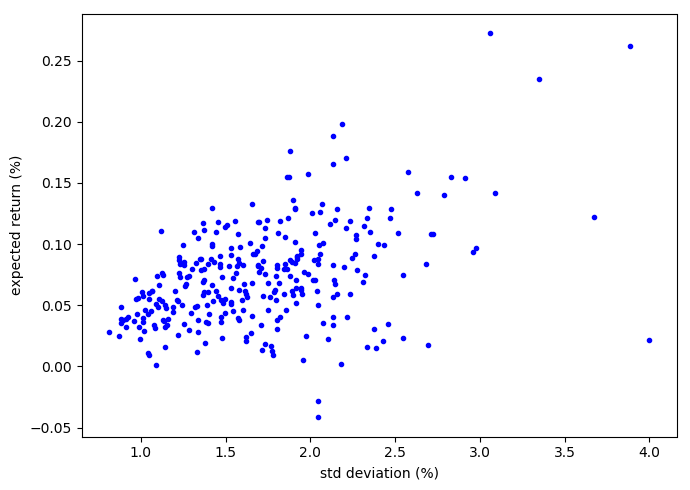

In [76]:
# plot each asset individually
figure(figsize=(7,5))
plot(sqrt.(diag(Σ)), μ, "b.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
tight_layout()
#savefig("folio3_assets.pdf")
;

In [77]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek
m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets] >= 0) # Investment amounts non-negative (cannot sell short assets)
@constraint(m, sum(x) == 1)     # Must invest all of portfolio

figure(figsize=(12,8))

subplot(211)
λ = 1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol1 = getvalue(x)
ix1 = findall(xsol1 .> 1e-4)
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
λ = 3e-2

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol2 = getvalue(x)
ix2 = findall(xsol2 .> 1e-4)
ret = dot(μ,xsol2)
std = sqrt(dot(xsol2,Σ*xsol2))
xlim(0,nAssets)
bar(1:nAssets,xsol2[ix])
title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()




ErrorException: Incompatible dimensions

In [78]:
figure(figsize=(12,8))
subplot(211)
λ = 0.1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol3 = getvalue(x)
ix3 = findall(xsol3 .> 1e-4)
ret = dot(μ,xsol3)
std = sqrt(dot(xsol3,Σ*xsol3))
xlim(0,nAssets)
bar(1:nAssets,xsol3[ix])
title(string("Optimal asset selection for \$\\lambda=0.1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()


#savefig("folio4_optassets.pdf")

ErrorException: Incompatible dimensions

In [79]:
ix1

UndefVarError: UndefVarError: ix1 not defined

In [80]:
# compute optimal tradeoff curve (this may take a few seconds)
N = 50
ret = zeros(N)
std = zeros(N)
lambda_values = exp10.(range(-3,stop=4,length=N))

for (i,λ) in enumerate(lambda_values)
    @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
    solve(m)
    xsol = getvalue(x)
    ret[i] = dot(μ,xsol)
    std[i] = sqrt(dot(xsol,Σ*xsol))
end

ErrorException: Incompatible dimensions

In [81]:
# plot tradeoff curve
plot(std,ret,"b-")
plot(sqrt.(diag(Σ)), μ, "k.", markersize=12)
#plot(sqrt.(diag(Σ))[ix1], μ[ix1], "r.", markersize=12)  # low-risk portfolio
plot(sqrt.(diag(Σ))[ix2], μ[ix2], "b.", markersize=12)  # at the "elbow" of the curve
xlabel("std deviation (%)")
ylabel("expected return (%)")
#axis([1.5,4.5,0,.4]);
tight_layout()
#savefig("folio5_pareto.pdf")

UndefVarError: UndefVarError: ix2 not defined

In [82]:
ix2

UndefVarError: UndefVarError: ix2 not defined

In [83]:
abs(-2.56975169751838e-13  )

2.56975169751838e-13

In [84]:
for i in 1:length(ix1)
    println("Company: - ", tickers[ix1[i]], " % Alloc: ", xsol1[ix1[i]]*100)
end


UndefVarError: UndefVarError: ix1 not defined

In [203]:
test_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
val_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw_test = CSV.read(test_file);
raw_val = CSV.read(val_file);

In [303]:
prices_test = convert(Matrix, CSV.read(test_file, header = true)[77:78])  # Prices - testing
prices_val = convert(Matrix, CSV.read(val_file, header = true)[77:78])  # Prices - validation

306×2 Array{Union{Missing, Float64},2}:
 6.6813e8    42.35
 5.75366e9  114.71
 2.22847e8   94.99
 1.50442e9   44.91
 4.99644e8   92.17
 2.24799e9   60.12
 6.18395e8   36.68
 6.69519e7  276.57
 2.27222e8   54.01
 2.44615e8   43.23
 1.78559e8   52.63
 1.11264e8   56.01
 1.2829e8    80.51
 ⋮                
 5.68539e8   29.98
 1.18147e8   72.65
 1.01187e8   69.19
 9.29378e7   89.38
 5.07466e8   35.91
 2.65662e8   42.32
 4.19481e9   77.95
 1.40335e8   60.85
 1.12857e9   10.63
 9.39457e8   33.26
 4.35354e8   74.0 
 1.88462e8  102.59

In [313]:
prices_test[:,1] .* prices_test[:,2]

306-element Array{Float64,1}:
 3.844817484704242e10 
 6.1334861327025e11   
 1.7375393295386066e10
 6.8550453348340004e10
 3.6621006668304e10   
 8.921959363760286e10 
 3.39813953492e10     
 1.6608383780559013e10
 1.1496078431875e10   
 1.1284694460724098e10
 1.124351109529018e10 
 4.743367581808207e9  
 8.088321879818486e9  
 ⋮                    
 2.0479730679374996e10
 1.07504836598629e10  
 1.501047853548e10    
 9.2856e9             
 1.807158102187519e10 
 1.4320713046936e10   
 3.955886713347579e11 
 7.54424692889e9      
 1.7122170736439999e10
 4.992412848229615e10 
 3.2434657783524086e10
 1.9177564445770985e10

In [88]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

UndefVarError: UndefVarError: ix1 not defined

In [89]:
check_profits(ix2, 100000, prices_test, prices_val, xsol2)

UndefVarError: UndefVarError: ix2 not defined

In [90]:
check_profits(ix3, 100000, prices_test, prices_val, xsol3)

UndefVarError: UndefVarError: ix3 not defined

In [91]:
#raw[:,1]

for i in 1:length(raw[:,1])
    if raw[i,1] == "AAPL"
        println("AAPLE")
    end
end

raw[1,1]

AAPLE
AAPLE
AAPLE
AAPLE


"AAL"

In [281]:
# train - train raw data
#TODO: fix to calculate bias for each company in test
function get_bias_diff(train, coeffs, test)
    actual_prices = train[78]
    num_shares = train[77]
    actual_valuations = actual_prices .* num_shares
    
#     raw_temp = train[:,3:76] #All fundamentals
#     raw_temp = convert(Matrix, raw_temp)
    raw_temp = re_normalize(train)
    exp_valuations = raw_temp * coeffs
    
    bias = []
    
    for s in test[:,1]
        sum_diff_valuations = 0
        count = 0
        for i in 1:length(train[:,1])
            if train[i,1] == s
                #println(exp_valuations[i])
                #println(actual_valuations[i])
                sum_diff_valuations += exp_valuations[i] - actual_valuations[i]
                count += 1
            end
        end
        if count == 0
            avg = 0
        else
            avg = sum_diff_valuations/count
        end
        push!(bias, avg)
        #break
    end
    
    return bias
end

get_bias_diff (generic function with 1 method)

In [282]:
bias = get_bias_diff(raw_train, coeffs, raw_test)

306-element Array{Any,1}:
  3.7552468622098564e10
  4.835420012449127e9  
  1.0292057616905087e10
 -2.61411672369273e10  
 -3.880500326040077e8  
 -1.2063476537962734e10
  3.7560050074732285e9 
 -5.291718522456313e9  
  8.244215706234662e9  
  8.093277073664832e9  
  8.164403843395029e9  
  2.318979917215265e9  
  9.022998383191631e9  
  ⋮                    
 -4.890584148866513e9  
  7.19303320078405e9   
  3.333408453295557e9  
  1.2258377516694727e10
 -1.353523579443496e10 
  9.0143253606228e9    
  1.0797897306780457e10
  2.876079290559806e9  
  6.540791876994148e9  
 -3.2101228524503403e9 
 -1.054924071117571e10 
  1.825089145581926e10 

In [291]:
#bias[202]
re_normalize(raw_test) * coeffs

306-element Array{Float64,1}:
 4.574303779876991e10 
 5.18461687416464e11  
 1.8868989813826523e10
 3.119231635705095e10 
 2.9091095300803238e10
 1.7625450674405514e10
 4.922972720689298e10 
 4.841728072320799e9  
 1.8295226777110382e10
 1.6122785953214485e10
 1.6914558617561722e10
 5.986984381885775e9  
 1.4975956777275085e10
 ⋮                    
 1.125767108721332e10 
 1.7110871953498402e10
 9.419040908496286e9  
 1.827151702863907e10 
 1.6360682963584606e10
 2.1123773263885387e10
 3.940036317251699e11 
 1.011838036316363e10 
 1.4082816220547794e10
 4.1312621326626595e10
 1.860361273743884e10 
 3.467255931146175e10 

In [186]:
# coeffs_orig = [-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

# coeffs_2 = [-4.55676e14, 2.46818e10, -3.77511e10, -1.38782e11, 6.95597e12, 1.03861e11, -2.71076e9, 1.87415e12, 2.69544e10, 6.21423e10, -1.05934e13, -3.03506e9, 1.18112e12, -3.40932e11, 2.10689e11, -6.27908e12, 5.99679e12, 3.87407e8, 6.64783e10, 1.31084e13, 5.38395e12, -1.63185e9, -4.1155e12, 3.56834e10, 6.19797e12, 2.63195e11, 1.54277e12, 6.96175e12, 2.09787e11, -4.2848e11, 8.6936e12, -2.30521e11, -1.17471e10, 1.71563e11, -6.94141e11, 3.61272e11, 2.13911e11, -1.21623e12, -1.10974e12, 1.61937e11, 1.57574e12, 3.78045e10, 2.98891e12, 1.27737e10, 3.35723e11, -7.6941e10, 8.33459e11, 5.8326e11, -2.51078e14, 1.28701e10, 1.11819e10, 1.995e12, -3.12065e11, 5.82627e10, -1.57679e10, 6.76803e10, 1.51553e11, 6.93257e10, 1.82232e10, 8.8073e9, 2.89928e11, 1.57745e10, -4.75023e10, -3.2283e14, 3.70423e12, -2.03617e13, 2.49779e12, 6.18186e14, -1.09324e13, -1.6194e13, 2.48495e13, 1.39488e13, 6.71318e10, -2.22554e10]

# t = coeffs_2./6.918889700378227e10
# t./coeffs_orig

In [187]:
# DON'T USE THESE COEFFS BECAUSE THEY WERE USING WRONG MATCHED DATA, NOT SPLIT ADJUSTED

#using CSV
#IPOPT Zach
#coeffs = [-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

#Mosek
#coeffs = [-3.29685, 2.10392, -2.87989, -4.71095e7, 214.789, 2.29925, -2.15471e7, 129.449, -1.86612, 0.878392, -62.6336, -1.04704e7, 54.5436, -2.04819, -6.15197, 2078.11, -2096.01, -8.79425, 10.5703, 49.0736, 48.8301, 1.61191e7, -62.5332, 13.7874, 49.2048, -2114.64, 128.127, 217.775, 5.58733, 1.76512, 48.2034, 1.41479, -8.08089, -2.07809, -4.6603, 3.39356, 3.1628, -214.997, -50.5996, 8.55579, 55.723, 12.2455, 125.514, -5.33886, 7.06743, -5.26894e8, 53.8186, 125.442, -1.9223, 2.44833, -0.537384, 218.727, -0.0972079, 9.85327, -1.1946, 5.35222e8, 3.2696e7, -7.26781e6, 4.27104e7, 0.430482, 0.744881, 1.03829, 0.495594, 0.0, 128.295, -53.9828, -78.382, 2.96552, -156.824, -155.604, 160.84, 62.4617, 0.194657, -7.09629e7]

#coeffs = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]

#Normalized
#coeffs_n = [-4.5859e14, 2.50025e10, -3.38327e10, -1.35684e11, 6.66542e12, 1.00277e11, -2.03853e10, 2.02611e12, 2.75485e10, 5.90631e10, -1.04976e13, 1.31135e10, 1.16194e12, -3.77356e11, 2.13436e11, -4.08099e12, 3.78494e12, 4.614e8, 6.98516e10, 1.29054e13, 5.30215e12, 3.12968e9, -4.09338e12, 3.77527e10, 6.09718e12, 1.27782e11, 1.66683e12, 6.6663e12, 2.10368e11, -4.96317e11, 8.55499e12, -2.63051e11, -1.27198e10, 1.76821e11, -7.06928e11, 3.71343e11, 2.14647e11, -1.15964e12, -1.16167e12, 1.61911e11, 1.62574e12, 4.28486e10, 3.23015e12, 1.54919e10, 3.5552e11, -7.13846e10, 8.21977e11, 6.29549e11, -2.52678e14, 1.3171e10, 1.15349e10, 1.91134e12, -3.42966e11, 5.92098e10, -1.67558e10, 6.43586e10, 1.50639e11, 6.88924e10, 2.06441e10, 8.5194e9, 2.80942e11, 1.65688e10, -4.90203e10, -3.24894e14, 3.99167e12, -1.96644e13, 2.00524e12, 6.22097e14, -1.06497e13, -1.55806e13, 2.38363e13, 1.38357e13, 6.00942e10, -1.92723e10]

# Normalized with intercep
#coeffs = [-4.55676e14, 2.46818e10, -3.77511e10, -1.38782e11, 6.95597e12, 1.03861e11, -2.71076e9, 1.87415e12, 2.69544e10, 6.21423e10, -1.05934e13, -3.03506e9, 1.18112e12, -3.40932e11, 2.10689e11, -6.27908e12, 5.99679e12, 3.87407e8, 6.64783e10, 1.31084e13, 5.38395e12, -1.63185e9, -4.1155e12, 3.56834e10, 6.19797e12, 2.63195e11, 1.54277e12, 6.96175e12, 2.09787e11, -4.2848e11, 8.6936e12, -2.30521e11, -1.17471e10, 1.71563e11, -6.94141e11, 3.61272e11, 2.13911e11, -1.21623e12, -1.10974e12, 1.61937e11, 1.57574e12, 3.78045e10, 2.98891e12, 1.27737e10, 3.35723e11, -7.6941e10, 8.33459e11, 5.8326e11, -2.51078e14, 1.28701e10, 1.11819e10, 1.995e12, -3.12065e11, 5.82627e10, -1.57679e10, 6.76803e10, 1.51553e11, 6.93257e10, 1.82232e10, 8.8073e9, 2.89928e11, 1.57745e10, -4.75023e10, -3.2283e14, 3.70423e12, -2.03617e13, 2.49779e12, 6.18186e14, -1.09324e13, -1.6194e13, 2.48495e13, 1.39488e13, 6.71318e10, -2.22554e10, 4.71412e9]

#Normalized, intercept, train only
#coeffs = [-1.26122e11, 2.07367e9, -4.47273e10, -1.53721e11, 8.27365e12, 2.11535e11, -1.68969e10, 6.80796e12, -5.25715e9, 6.20213e10, -2.29077e13, -1.74588e10, 1.23063e12, -8.13211e10, -1.14333e11, 1.62186e14, -1.62916e14, -2.2595e9, 1.55658e11, 1.18791e13, 3.37914e12, -7.90591e7, -9.43417e12, 4.27679e11, 4.08359e12, -8.22755e12, 5.6008e12, 7.17529e12, 4.60895e10, 2.23647e11, 8.12727e12, 9.15877e10, -1.13311e10, -8.38844e10, -2.10956e11, 1.99755e11, 7.26393e10, -1.56658e12, -2.27224e12, 1.04059e11, 2.50797e12, 7.34804e11, 1.0772e13, -2.67118e10, 4.13722e11, -4.67761e10, 7.42256e11, 1.61995e12, -2.73859e10, 1.92271e10, -9.3716e8, 2.41522e12, 4.17107e9, 2.01475e10, -2.17e10, 5.82628e10, 1.36483e11, -1.52568e9, 4.99558e10, 5.64083e9, 2.93466e11, 4.26637e9, 4.86479e10, 2.1141e10, 1.34949e13, -1.86862e13, -1.07243e13, 1.55113e11, -2.72616e13, -3.65741e13, 5.58461e13, 3.04966e13, 4.63106e10, -4.13906e9, 1.67346e9]

#percent_diffs = get_diff_expected_prices(coeffs, raw_test, 2)

In [292]:
using CSV
coeffs = [-5.70356e14, 2.05396e10, -7.18393e10, -1.85909e11, 7.02275e12, 8.72143e10, -8.65342e9, 4.42853e12, 1.55964e10, -2.83099e9, 4.39582e12, -5.39104e9, 8.61803e11, -3.32481e11, 1.2151e11, 9.62581e13, -9.61073e13, 7.42026e9, 2.2769e10, 9.25989e12, 3.77941e12, 1.72924e10, 1.72533e12, 2.12777e10, 4.47301e12, -6.08057e12, 3.65248e12, 6.94972e12, 1.70492e11, -3.60345e11, 6.2001e12, -2.70019e11, -8.7377e9, 1.20104e11, -4.75848e11, 3.22162e11, 7.2644e10, -1.27765e12, -3.06167e12, 8.20039e10, 3.15543e12, -1.47952e10, 6.75338e12, 3.48025e10, 5.60541e11, -1.05393e11, 6.4975e11, 1.14813e12, -3.14184e14, 9.99228e9, 1.11959e10, 2.01743e12, -2.64519e11, 1.71905e10, -3.59735e10, 1.3597e11, 1.91675e11, 4.99202e10, 7.8925e9, -5.84887e10, 2.66363e11, 9.12478e9, 8.07864e10, -4.04067e14, 8.59193e12, -1.46795e13, -5.82343e12, 7.73806e14, -8.59508e12, -1.28688e13, 1.99519e13, -5.92566e12, -6.39398e10, -7.55342e7, -5.55713e9]

percent_diffs = get_diff_expected_prices(coeffs, raw_test, 1)

Expected valuation for AAL before bias: 4.574303779876991e10
Expected valuation for AAL: 8.190569176671349e9
Actual valuation for AAL: 3.844817484704242e10
Bias: 3.7552468622098564e10
Percent diff: -78.6971183697127


306-element Array{Float64,1}:
 -78.6971183697127   
 -16.258673079007366 
 -50.63747881206816  
 -16.363086174445243 
 -19.502089059387163 
 -66.7237587598074   
  33.819467188213345 
 -38.985955956540195 
 -12.57008961414671  
 -28.846023191004242 
 -22.17595820373171  
 -22.670878834310386 
 -26.400575019931733 
   ⋮                 
 -21.15006057016836  
  -7.7451855515788814
 -59.45743874310051  
 -35.242315930641624 
  65.43056593571595  
 -15.441026828943608 
  -3.1302556957930707
  -4.002332626864354 
 -55.95170460774318  
 -10.819185967632123 
 -10.11820243892508  
 -14.37042017468608  

In [295]:
minimum(percent_diffs)
#percent_diffs[202]

-750.5775084124158

In [96]:
raw_val[:,78]

306-element Array{Union{Missing, Float64},1}:
  42.349998  
 114.709999  
  94.989998  
  44.91      
  92.169998  
  60.119999  
  36.68      
 276.570007  
  54.009998  
  43.23      
  52.630001  
  56.009998  
  80.510002  
   ⋮         
  29.98      
  72.650002  
  69.190002  
  89.379997  
  35.91      
  42.32      
  77.949997  
  60.849998  
  10.63      
  33.259998  
  53.19914019
 102.589996  

In [97]:
maximum(percent_diffs)

393.0404377299225

In [98]:
for i in 1:length(raw_test[:,1])
    println(raw_test[i,1],"  ", percent_diffs[i])
end

AAL  -48.8013198790651
AAPL  -43.28231251646719
ABC  -34.31250294354074
ABT  -40.12349772747596
ADBE  -21.07457964742557
ADI  -69.07544883426185
ADM  17.148318690287894
ADS  -47.519549930248154
ADSK  -32.545409374215936
AEE  -25.44786467434596
AKAM  -18.33163728087555
ALB  10.208042680140785
ALK  -46.7961768135551
ALXN  -20.39704906953559
AMAT  -13.092915942547078
AME  0.8128249105377723
AMGN  -7.555282994713622
AMT  -15.337612673591558
AMZN  43.17996165785642
AN  -20.674110776728842
APA  -29.35519423559494
APC  110.75349418728118
APD  -6.180378441917218
APH  -38.694348060415656
ARNC  -54.57171670997547
ATVI  28.93928203199449
AWK  -9.0647132757865
AYI  55.749430081399574
AZO  6.643865838302589
BA  -15.047871808975028
BAX  -79.1046231308705
BBBY  -10.70784043109052
BBY  -85.12350960167791
BCR  -15.677109214937854
BDX  57.67709966641392
BHI  7.314819159279849
BIIB  -3.1041453577423646
BLL  17.448735710028373
BMY  -9.961404079520404
BSX  -25.393106303170565
BWA  -5.035949053182791
CAG  -

In [42]:
raw_val = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv")
percent_diffs_val = get_diff_expected_prices(coeffs, raw_val)

306-element Array{Float64,1}:
  101.0141076973337   
   -5.055683442354068 
  116.0689286282224   
  -15.276714262234462 
  -43.93835426024885  
  -83.96371565457275  
  -37.21379443341317  
 -116.04962755997272  
    9.285117949737767 
   51.28455151440804  
   66.99697049720649  
   43.588152352859176 
   42.52222106963899  
    ⋮                 
  -12.898362657291823 
  101.15093581139922  
  142.65985734546064  
  373.6692485307582   
   -1.6389429130823232
  101.07252231743647  
  -13.918116262724354 
    9.508250808871535 
   73.97861990808215  
  -92.0953634683077   
   -3.475522290639479 
 -234.46573621925643  

In [100]:
stock_num = 303
println(raw_test[stock_num,1])
println(raw_test[stock_num,78])
println(raw_val[stock_num,78])

XRX
13.86
10.63


In [101]:
raw_train = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_training_set.csv")
get_bias(raw_train, coeffs)

UndefVarError: UndefVarError: get_bias not defined

In [102]:
m = coeffs[1] / coeffs_n[1]
#abs(coeffs_n.*m) - abs(coeffs)

print(broadcast(abs, coeffs)./broadcast(abs, coeffs_n.*m))

[1.0, 14.4758, 4.29251, 1.20494e7, 1.83199, 0.759572, 6.67331e7, 1.29357, 25.6586, 1.02182, 0.191107, 5.72492e7, 3.03544, 1.22851, 2.39596, 0.227818, 0.185583, 421.588, 4.95513, 0.273076, 0.658007, 7.1739e8, 0.467615, 1.79247, 0.570912, 7.0227, 1.46374, 1.81372, 4.49647, 0.581532, 0.406201, 1.22371, 49.5099, 1.61853, 1.50335, 1.10452, 3.09744, 9.62292, 1.32711, 4.09302, 1.32159, 0.913232, 0.745083, 2.62824, 0.940433, 1.46011e8, 4.50317, 3.82293, 1.81568, 3.3133, 39.0977, 6.38575, 1.2254, 9.82289, 3.00973, 1.35558e8, 7.66366e6, 1.96107e8, 5.95591e7, 4.78498, 0.166171, 13.8536, 0.741535, 1.41182, 0.646425, 0.17103, 0.491729, 0.73683, 0.391664, 0.242862, 0.168669, 0.143526, 0.292042, 1.41429e9]

In [103]:
print(coeffs)

[-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

In [104]:
print(coeffs_n)

[-4.5859e14, 2.50025e10, -3.38327e10, -1.35684e11, 6.66542e12, 1.00277e11, -2.03853e10, 2.02611e12, 2.75485e10, 5.90631e10, -1.04976e13, 1.31135e10, 1.16194e12, -3.77356e11, 2.13436e11, -4.08099e12, 3.78494e12, 4.614e8, 6.98516e10, 1.29054e13, 5.30215e12, 3.12968e9, -4.09338e12, 3.77527e10, 6.09718e12, 1.27782e11, 1.66683e12, 6.6663e12, 2.10368e11, -4.96317e11, 8.55499e12, -2.63051e11, -1.27198e10, 1.76821e11, -7.06928e11, 3.71343e11, 2.14647e11, -1.15964e12, -1.16167e12, 1.61911e11, 1.62574e12, 4.28486e10, 3.23015e12, 1.54919e10, 3.5552e11, -7.13846e10, 8.21977e11, 6.29549e11, -2.52678e14, 1.3171e10, 1.15349e10, 1.91134e12, -3.42966e11, 5.92098e10, -1.67558e10, 6.43586e10, 1.50639e11, 6.88924e10, 2.06441e10, 8.5194e9, 2.80942e11, 1.65688e10, -4.90203e10, -3.24894e14, 3.99167e12, -1.96644e13, 2.00524e12, 6.22097e14, -1.06497e13, -1.55806e13, 2.38363e13, 1.38357e13, 6.00942e10, -1.92723e10]

In [105]:
using Statistics
sort(percent_diffs)

306-element Array{Float64,1}:
 -387.12973979604885
 -331.9404953767112 
 -208.6147380927813 
 -174.67808710619173
 -101.44511350782237
  -93.56121080425372
  -85.12350960167791
  -79.1046231308705 
  -71.93787960056892
  -69.07544883426185
  -68.57141498549517
  -66.58990377144414
  -65.67728272084543
    ⋮               
   72.5018907015881 
   72.70786481199927
   73.91111480122282
   76.76180504556423
   79.56598549965554
  107.46187145994759
  110.75349418728118
  111.33887006328874
  117.88560729796357
  145.7466327652431 
  284.59355866087094
  393.0404377299225 

In [106]:
#using Statistics
#sort(percent_diffs)

In [107]:
using LinearAlgebra
LUK = convert(Array, raw[343,3:76])
LUK*coeffs

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[107]:2
└ @ Core In[107]:2


1-element Array{Any,1}:
 2.4288627420237488e10

In [108]:
for i in percent_diffs
    if i<=-100
        println(i)
    elseif i>=100
        println(i)
    end
end


#print(percent_diffs)

110.75349418728118
-387.12973979604885
111.33887006328874
393.0404377299225
284.59355866087094
-101.44511350782237
-174.67808710619173
145.7466327652431
-331.9404953767112
107.46187145994759
117.88560729796357
-208.6147380927813


In [109]:
maximum(percent_diffs)

393.0404377299225

In [110]:
using Statistics

mean(percent_diffs)
#percent_diffs[:]

-5.88421644504907

In [296]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 306


306

In [297]:
#import Pkg; Pkg.add("pyPlot")

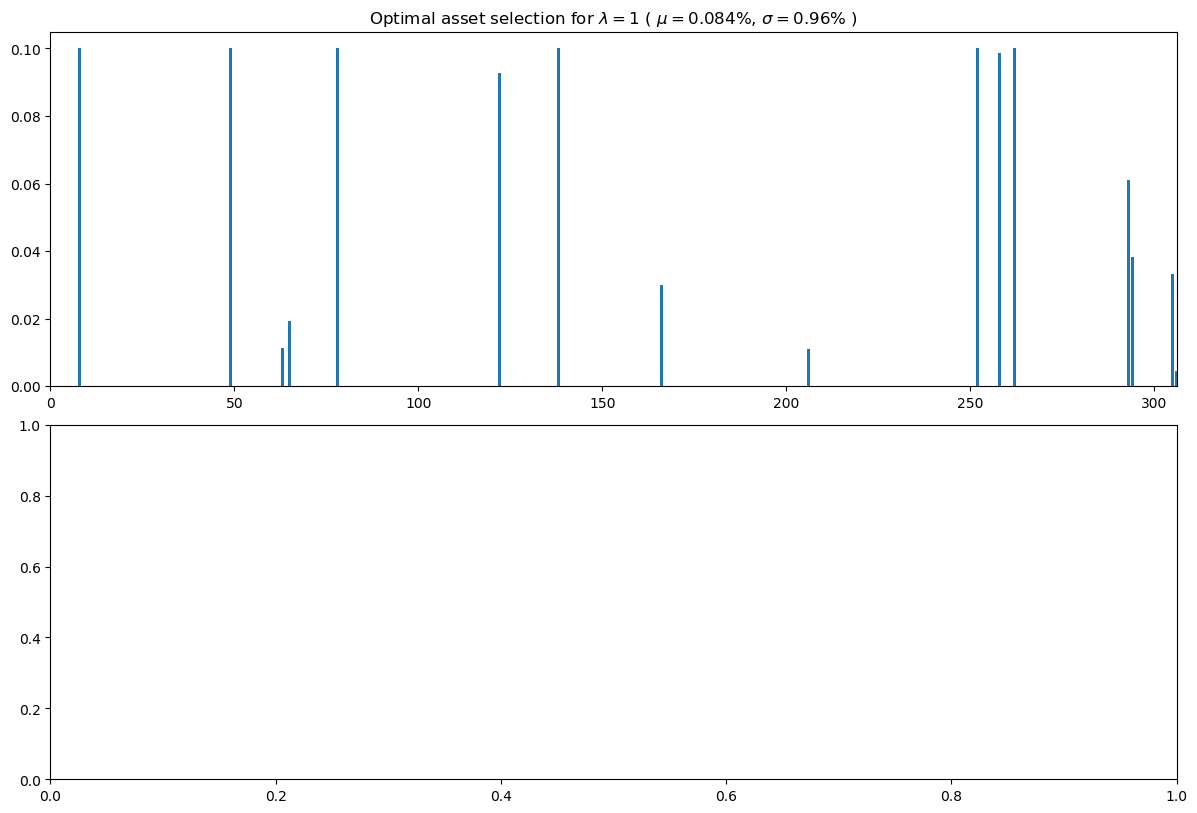

In [349]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek, PyPlot

m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets]) # Investment amounts non-negative (cannot sell short assets)

@constraint(m, max_c[i in 1:nAssets], x[i] >= 0) # Investment amounts non-negative (cannot sell short assets)
@constraint(m, min_c[i in 1:nAssets], x[i] <= 0.1)

@constraint(m,sum(x) == 1)     # Must invest all of portfolio


figure(figsize=(12,8))

subplot(211)
λ = 0.1
t2 = 0.001
#t2 = 0
@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) - t2*dot(percent_diffs,x))
solve(m)
xsol1 = getvalue(x)
xsol1 = clean_xsol(xsol1)
ix1 = findall(xsol1 .> 1e-4 )
#ix1 = findall(xsol1 .< -1e-4 ) #for short portfolio
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
#λ = 3e-2

# @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
# solve(m)
# xsol2 = getvalue(x)
# ix2 = findall(xsol2 .> 1e-4)
# ret = dot(μ,xsol2)
# std = sqrt(dot(xsol2,Σ*xsol2))
# xlim(0,nAssets)
# bar(1:nAssets,xsol2[ix])
# title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
# tight_layout()


#print(m)

In [350]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

Percent invested: 0.030040877498004017
Bought APC at 4.16066282445e10 sold: 2.4665961562607998e10
Percent invested: 0.09874524439439228
Bought AZO at 1.7923535007773167e10 sold: 2.292675400803083e10
Percent invested: 0.011219645242074198
Bought BDX at 2.2000790806320835e10 sold: 2.6880088273317627e10
Percent invested: 0.09999997877999534
Bought DLTR at 1.1001928465752e10 sold: 1.4640247009368694e10
Percent invested: 0.1000000002319023
Bought DUK at 5.913752702016673e10 sold: 4.963808325707136e10
Percent invested: 0.09999999600969016
Bought F at 2.3556172833e10 sold: 5.585245699455e10
Percent invested: 0.03808942573039745
Bought GILD at 1.4347676532917673e11 sold: 1.481284201114484e11
Percent invested: 0.10000000369211846
Bought MA at 1.0020602394137003e11 sold: 1.1034133443421333e11
Percent invested: 0.03331240156307312
Bought NFLX at 2.0527299215543518e10 sold: 4.83713007313e10
Percent invested: 0.09999998525516753
Bought PPL at 2.390348995392409e10 sold: 2.3046198696671524e10
Percent

In [115]:
minimum(xsol1)

-0.4999999265309413

In [116]:
t2*dot(percent_diffs,xsol1)

107.66876067927456

In [117]:
clean_xsol(xsol1)

306-element Array{Float64,1}:
 -0.18140080721654492 
 -0.4557685263731441  
  0.05500676898260934 
 -0.4999973311745324  
 -0.12816967537800164 
 -0.4999991425443202  
  0.2150919920578308  
 -0.24802469050780873 
 -0.05326898668759297 
 -0.4999938237706174  
 -0.03920786738614903 
  0.4959826759995697  
 -0.4999848747082273  
  ⋮                   
  0.05345013167461877 
  0.2229219031764939  
 -0.08542074526631416 
  0.028235292149419146
  0.49999968425160907 
 -0.4999982958423237  
 -0.16070405533623378 
  0.358074148495476   
 -0.26597857153505927 
 -0.0694549899120836  
 -0.14627363892985115 
  0.052053586791947985

In [118]:
raw_test[173,:]

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
173,LUV,31/12/14,2768000000,54000000,-302000000,17,-1748000000,1315000000,50,1282000000,0,808000000,7.677e9,66,0,2782000000,938000000,1923000000,1816000000,0,0,1.4292e10,970000000,59,1.0928e10,680000000,0,107000000,342000000,105000000,362000000,2.434e9,0.0,0,0,-272000000,-73000000,2902000000,-1248000000,-1727000000,1136000000,780000000,1136000000,1136000000,365000000,126000000,2225000000,12,534000000,232000000,2897000000,-738000000,8000000,-84000000,1809000000,-368000000,938000000,10,27,6,61,0,7.416e9,-845000000,7639000000,258000000,1706000000,1.9723e10,3.927e9,5923000000,6.775e9,1.2948e10,1.9723e10,1.8605e10,-2.026e9,1.65,6.88485e8,42.32
